In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sampler import sample_from_logreg

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
#X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
X, _, y = sample_from_logreg(n=250, p=20, seed=120)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [3]:
X_scaled = StandardScaler().fit_transform(X)
#X_scaled = X
print(X_scaled.shape)

(250, 20)


In [4]:
clf = SVC(kernel='linear')
clf.fit(X_scaled, y)
sk_coef_og = clf.coef_.flatten()
sk_coef = clf.coef_/np.linalg.norm(clf.coef_)
print(clf.coef_)
print(clf.intercept_)

[[ 1.44119178e+00 -2.29122060e-01 -4.73133921e-01 -5.71197691e-01
  -9.23568038e-02 -4.16302288e-01  2.29394113e-01 -2.91213658e-02
  -1.85803923e-01  1.53175947e-01  2.37632445e-01  1.26117844e-01
   1.51192806e-01 -1.06962035e-03  1.36621515e-02  4.48711746e-01
   1.74007771e+00  2.70215171e-02 -2.03117321e+00  3.15806682e-02]]
[-0.02560786]


In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.88

In [6]:
sigma = 1e-1
lbd = 1

In [11]:
# calculate maximum bound
from sklearn.metrics import pairwise_distances
m_max = np.min(pairwise_distances(X))**2
m_max = 1
print(m_max)

C = np.linalg.norm(X.T @ X)/(n - 1)

max_bound = 1 + C/(lbd * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
print(max_bound)

# what lambda do we have to pick?
b = 200
lbd_pick = C/((b - 1) * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
lbd_pick

1
1.0227857474476008


0.00011450124345528038

In [8]:
clf = SVM_smooth(sigma=sigma, lbd=lbd)
clf.fit(X_scaled, y, thresh=1e-7, n_iter=2500, eta=0.5/n,
        approx_cv=True, cv=True, log_iter=True, log_iacv=True,
        save_cond_nums=True, save_err_approx=True, save_err_cv=True,
        warm_start=0, normalise=False, adjust_factor=True,
        save_hessian_norms=True)
print(f"grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))}")
coef = clf.weights_/np.linalg.norm(clf.weights_)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

2024-01-31 23:36:36.804572: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


iter 0 | grad 0.70704 | objective 1.00249 | IACV: 0.00000566 | baseline: 0.00140885
iter 1 | grad 0.70562 | objective 1.00220 | IACV: 0.00001130 | baseline: 0.00140165
iter 2 | grad 0.70420 | objective 1.00191 | IACV: 0.00001694 | baseline: 0.00139535
iter 3 | grad 0.70278 | objective 1.00162 | IACV: 0.00002256 | baseline: 0.00138995
iter 4 | grad 0.70137 | objective 1.00133 | IACV: 0.00002818 | baseline: 0.00138544
iter 5 | grad 0.69996 | objective 1.00104 | IACV: 0.00003378 | baseline: 0.00138184
iter 6 | grad 0.69855 | objective 1.00075 | IACV: 0.00003937 | baseline: 0.00137915
iter 7 | grad 0.69715 | objective 1.00046 | IACV: 0.00004495 | baseline: 0.00137736
iter 8 | grad 0.69575 | objective 1.00017 | IACV: 0.00005051 | baseline: 0.00137648
iter 9 | grad 0.69435 | objective 0.99988 | IACV: 0.00005607 | baseline: 0.00137650
iter 10 | grad 0.69295 | objective 0.99959 | IACV: 0.00006161 | baseline: 0.00137742
iter 11 | grad 0.69156 | objective 0.99931 | IACV: 0.00006715 | baseline: 0

iter 101 | grad 0.57670 | objective 0.97577 | IACV: 0.00052174 | baseline: 0.00327612
iter 102 | grad 0.57553 | objective 0.97553 | IACV: 0.00052634 | baseline: 0.00330259
iter 103 | grad 0.57437 | objective 0.97529 | IACV: 0.00053092 | baseline: 0.00332906
iter 104 | grad 0.57320 | objective 0.97505 | IACV: 0.00053549 | baseline: 0.00335552
iter 105 | grad 0.57204 | objective 0.97482 | IACV: 0.00054006 | baseline: 0.00338196
iter 106 | grad 0.57088 | objective 0.97458 | IACV: 0.00054461 | baseline: 0.00340840
iter 107 | grad 0.56973 | objective 0.97435 | IACV: 0.00054916 | baseline: 0.00343482
iter 108 | grad 0.56857 | objective 0.97411 | IACV: 0.00055369 | baseline: 0.00346122
iter 109 | grad 0.56742 | objective 0.97388 | IACV: 0.00055822 | baseline: 0.00348761
iter 110 | grad 0.56627 | objective 0.97365 | IACV: 0.00056274 | baseline: 0.00351398
iter 111 | grad 0.56512 | objective 0.97341 | IACV: 0.00056724 | baseline: 0.00354033
iter 112 | grad 0.56397 | objective 0.97318 | IACV: 0.

iter 197 | grad 0.47061 | objective 0.95518 | IACV: 0.00091478 | baseline: 0.00568174
iter 198 | grad 0.46943 | objective 0.95499 | IACV: 0.00091810 | baseline: 0.00570473
iter 199 | grad 0.46824 | objective 0.95481 | IACV: 0.00092139 | baseline: 0.00572766
iter 200 | grad 0.46705 | objective 0.95462 | IACV: 0.00092466 | baseline: 0.00575054
iter 201 | grad 0.46584 | objective 0.95443 | IACV: 0.00092789 | baseline: 0.00577336
iter 202 | grad 0.46464 | objective 0.95425 | IACV: 0.00093109 | baseline: 0.00579613
iter 203 | grad 0.46342 | objective 0.95406 | IACV: 0.00093426 | baseline: 0.00581884
iter 204 | grad 0.46220 | objective 0.95388 | IACV: 0.00093740 | baseline: 0.00584150
iter 205 | grad 0.46098 | objective 0.95369 | IACV: 0.00094051 | baseline: 0.00586411
iter 206 | grad 0.45975 | objective 0.95351 | IACV: 0.00094359 | baseline: 0.00588666
iter 207 | grad 0.45852 | objective 0.95333 | IACV: 0.00094665 | baseline: 0.00590916
iter 208 | grad 0.45729 | objective 0.95315 | IACV: 0.

iter 294 | grad 0.37493 | objective 0.93963 | IACV: 0.00121523 | baseline: 0.00771625
iter 295 | grad 0.37412 | objective 0.93949 | IACV: 0.00121823 | baseline: 0.00773528
iter 296 | grad 0.37331 | objective 0.93936 | IACV: 0.00122122 | baseline: 0.00775427
iter 297 | grad 0.37250 | objective 0.93922 | IACV: 0.00122420 | baseline: 0.00777323
iter 298 | grad 0.37170 | objective 0.93908 | IACV: 0.00122718 | baseline: 0.00779214
iter 299 | grad 0.37089 | objective 0.93894 | IACV: 0.00123014 | baseline: 0.00781101
iter 300 | grad 0.37009 | objective 0.93880 | IACV: 0.00123310 | baseline: 0.00782984
iter 301 | grad 0.36928 | objective 0.93866 | IACV: 0.00123605 | baseline: 0.00784863
iter 302 | grad 0.36848 | objective 0.93853 | IACV: 0.00123899 | baseline: 0.00786738
iter 303 | grad 0.36768 | objective 0.93839 | IACV: 0.00124192 | baseline: 0.00788608
iter 304 | grad 0.36688 | objective 0.93825 | IACV: 0.00124484 | baseline: 0.00790475
iter 305 | grad 0.36608 | objective 0.93812 | IACV: 0.

iter 396 | grad 0.29397 | objective 0.92724 | IACV: 0.00146025 | baseline: 0.00943619
iter 397 | grad 0.29318 | objective 0.92713 | IACV: 0.00146192 | baseline: 0.00945073
iter 398 | grad 0.29239 | objective 0.92703 | IACV: 0.00146358 | baseline: 0.00946523
iter 399 | grad 0.29160 | objective 0.92693 | IACV: 0.00146522 | baseline: 0.00947969
iter 400 | grad 0.29082 | objective 0.92683 | IACV: 0.00146685 | baseline: 0.00949410
iter 401 | grad 0.29003 | objective 0.92673 | IACV: 0.00146847 | baseline: 0.00950847
iter 402 | grad 0.28924 | objective 0.92663 | IACV: 0.00147009 | baseline: 0.00952279
iter 403 | grad 0.28846 | objective 0.92653 | IACV: 0.00147168 | baseline: 0.00953707
iter 404 | grad 0.28768 | objective 0.92643 | IACV: 0.00147327 | baseline: 0.00955130
iter 405 | grad 0.28689 | objective 0.92633 | IACV: 0.00147485 | baseline: 0.00956549
iter 406 | grad 0.28611 | objective 0.92623 | IACV: 0.00147641 | baseline: 0.00957963
iter 407 | grad 0.28533 | objective 0.92614 | IACV: 0.

iter 497 | grad 0.21915 | objective 0.91881 | IACV: 0.00157463 | baseline: 0.01068239
iter 498 | grad 0.21848 | objective 0.91875 | IACV: 0.00157531 | baseline: 0.01069266
iter 499 | grad 0.21781 | objective 0.91868 | IACV: 0.00157598 | baseline: 0.01070290
iter 500 | grad 0.21715 | objective 0.91861 | IACV: 0.00157665 | baseline: 0.01071310
iter 501 | grad 0.21648 | objective 0.91855 | IACV: 0.00157732 | baseline: 0.01072326
iter 502 | grad 0.21582 | objective 0.91848 | IACV: 0.00157799 | baseline: 0.01073340
iter 503 | grad 0.21516 | objective 0.91842 | IACV: 0.00157865 | baseline: 0.01074349
iter 504 | grad 0.21450 | objective 0.91836 | IACV: 0.00157930 | baseline: 0.01075356
iter 505 | grad 0.21384 | objective 0.91829 | IACV: 0.00157995 | baseline: 0.01076359
iter 506 | grad 0.21318 | objective 0.91823 | IACV: 0.00158060 | baseline: 0.01077358
iter 507 | grad 0.21253 | objective 0.91817 | IACV: 0.00158125 | baseline: 0.01078355
iter 508 | grad 0.21187 | objective 0.91810 | IACV: 0.

iter 598 | grad 0.16039 | objective 0.91347 | IACV: 0.00163586 | baseline: 0.01155989
iter 599 | grad 0.15989 | objective 0.91343 | IACV: 0.00163643 | baseline: 0.01156703
iter 600 | grad 0.15939 | objective 0.91339 | IACV: 0.00163700 | baseline: 0.01157414
iter 601 | grad 0.15889 | objective 0.91335 | IACV: 0.00163757 | baseline: 0.01158123
iter 602 | grad 0.15839 | objective 0.91330 | IACV: 0.00163814 | baseline: 0.01158828
iter 603 | grad 0.15789 | objective 0.91326 | IACV: 0.00163870 | baseline: 0.01159531
iter 604 | grad 0.15740 | objective 0.91322 | IACV: 0.00163926 | baseline: 0.01160230
iter 605 | grad 0.15690 | objective 0.91318 | IACV: 0.00163983 | baseline: 0.01160927
iter 606 | grad 0.15641 | objective 0.91314 | IACV: 0.00164039 | baseline: 0.01161620
iter 607 | grad 0.15592 | objective 0.91310 | IACV: 0.00164094 | baseline: 0.01162311
iter 608 | grad 0.15543 | objective 0.91306 | IACV: 0.00164150 | baseline: 0.01162998
iter 609 | grad 0.15494 | objective 0.91302 | IACV: 0.

iter 702 | grad 0.11466 | objective 0.91003 | IACV: 0.00168290 | baseline: 0.01215022
iter 703 | grad 0.11428 | objective 0.91000 | IACV: 0.00168323 | baseline: 0.01215449
iter 704 | grad 0.11390 | objective 0.90998 | IACV: 0.00168355 | baseline: 0.01215875
iter 705 | grad 0.11353 | objective 0.90995 | IACV: 0.00168387 | baseline: 0.01216298
iter 706 | grad 0.11315 | objective 0.90993 | IACV: 0.00168419 | baseline: 0.01216718
iter 707 | grad 0.11278 | objective 0.90990 | IACV: 0.00168451 | baseline: 0.01217136
iter 708 | grad 0.11240 | objective 0.90988 | IACV: 0.00168483 | baseline: 0.01217552
iter 709 | grad 0.11203 | objective 0.90985 | IACV: 0.00168514 | baseline: 0.01217965
iter 710 | grad 0.11166 | objective 0.90983 | IACV: 0.00168545 | baseline: 0.01218376
iter 711 | grad 0.11129 | objective 0.90980 | IACV: 0.00168576 | baseline: 0.01218784
iter 712 | grad 0.11092 | objective 0.90978 | IACV: 0.00168607 | baseline: 0.01219190
iter 713 | grad 0.11055 | objective 0.90975 | IACV: 0.

iter 804 | grad 0.08131 | objective 0.90795 | IACV: 0.00170667 | baseline: 0.01247318
iter 805 | grad 0.08103 | objective 0.90793 | IACV: 0.00170683 | baseline: 0.01247535
iter 806 | grad 0.08076 | objective 0.90792 | IACV: 0.00170697 | baseline: 0.01247749
iter 807 | grad 0.08048 | objective 0.90790 | IACV: 0.00170712 | baseline: 0.01247962
iter 808 | grad 0.08021 | objective 0.90789 | IACV: 0.00170727 | baseline: 0.01248173
iter 809 | grad 0.07994 | objective 0.90787 | IACV: 0.00170742 | baseline: 0.01248383
iter 810 | grad 0.07966 | objective 0.90786 | IACV: 0.00170756 | baseline: 0.01248591
iter 811 | grad 0.07939 | objective 0.90784 | IACV: 0.00170771 | baseline: 0.01248797
iter 812 | grad 0.07912 | objective 0.90783 | IACV: 0.00170785 | baseline: 0.01249001
iter 813 | grad 0.07885 | objective 0.90781 | IACV: 0.00170799 | baseline: 0.01249204
iter 814 | grad 0.07858 | objective 0.90780 | IACV: 0.00170812 | baseline: 0.01249405
iter 815 | grad 0.07831 | objective 0.90778 | IACV: 0.

iter 906 | grad 0.05738 | objective 0.90666 | IACV: 0.00171678 | baseline: 0.01261890
iter 907 | grad 0.05719 | objective 0.90665 | IACV: 0.00171684 | baseline: 0.01261970
iter 908 | grad 0.05699 | objective 0.90664 | IACV: 0.00171691 | baseline: 0.01262049
iter 909 | grad 0.05680 | objective 0.90663 | IACV: 0.00171697 | baseline: 0.01262127
iter 910 | grad 0.05661 | objective 0.90662 | IACV: 0.00171702 | baseline: 0.01262204
iter 911 | grad 0.05641 | objective 0.90661 | IACV: 0.00171708 | baseline: 0.01262280
iter 912 | grad 0.05622 | objective 0.90660 | IACV: 0.00171714 | baseline: 0.01262355
iter 913 | grad 0.05603 | objective 0.90659 | IACV: 0.00171720 | baseline: 0.01262429
iter 914 | grad 0.05584 | objective 0.90658 | IACV: 0.00171726 | baseline: 0.01262502
iter 915 | grad 0.05565 | objective 0.90657 | IACV: 0.00171731 | baseline: 0.01262575
iter 916 | grad 0.05546 | objective 0.90657 | IACV: 0.00171737 | baseline: 0.01262646
iter 917 | grad 0.05527 | objective 0.90656 | IACV: 0.

iter 1010 | grad 0.04044 | objective 0.90584 | IACV: 0.00172159 | baseline: 0.01265835
iter 1011 | grad 0.04031 | objective 0.90583 | IACV: 0.00172163 | baseline: 0.01265839
iter 1012 | grad 0.04018 | objective 0.90583 | IACV: 0.00172167 | baseline: 0.01265842
iter 1013 | grad 0.04004 | objective 0.90582 | IACV: 0.00172171 | baseline: 0.01265845
iter 1014 | grad 0.03991 | objective 0.90582 | IACV: 0.00172175 | baseline: 0.01265847
iter 1015 | grad 0.03978 | objective 0.90581 | IACV: 0.00172179 | baseline: 0.01265849
iter 1016 | grad 0.03965 | objective 0.90580 | IACV: 0.00172183 | baseline: 0.01265850
iter 1017 | grad 0.03952 | objective 0.90580 | IACV: 0.00172187 | baseline: 0.01265851
iter 1018 | grad 0.03939 | objective 0.90579 | IACV: 0.00172191 | baseline: 0.01265852
iter 1019 | grad 0.03926 | objective 0.90579 | IACV: 0.00172195 | baseline: 0.01265851
iter 1020 | grad 0.03913 | objective 0.90578 | IACV: 0.00172199 | baseline: 0.01265851
iter 1021 | grad 0.03900 | objective 0.9057

iter 1114 | grad 0.02888 | objective 0.90532 | IACV: 0.00172640 | baseline: 0.01264131
iter 1115 | grad 0.02879 | objective 0.90531 | IACV: 0.00172646 | baseline: 0.01264099
iter 1116 | grad 0.02870 | objective 0.90531 | IACV: 0.00172651 | baseline: 0.01264067
iter 1117 | grad 0.02861 | objective 0.90530 | IACV: 0.00172657 | baseline: 0.01264035
iter 1118 | grad 0.02852 | objective 0.90530 | IACV: 0.00172663 | baseline: 0.01264002
iter 1119 | grad 0.02843 | objective 0.90530 | IACV: 0.00172668 | baseline: 0.01263970
iter 1120 | grad 0.02834 | objective 0.90529 | IACV: 0.00172674 | baseline: 0.01263937
iter 1121 | grad 0.02825 | objective 0.90529 | IACV: 0.00172680 | baseline: 0.01263903
iter 1122 | grad 0.02816 | objective 0.90529 | IACV: 0.00172685 | baseline: 0.01263870
iter 1123 | grad 0.02807 | objective 0.90528 | IACV: 0.00172691 | baseline: 0.01263837
iter 1124 | grad 0.02798 | objective 0.90528 | IACV: 0.00172697 | baseline: 0.01263803
iter 1125 | grad 0.02790 | objective 0.9052

iter 1218 | grad 0.02096 | objective 0.90498 | IACV: 0.00173334 | baseline: 0.01259999
iter 1219 | grad 0.02089 | objective 0.90497 | IACV: 0.00173342 | baseline: 0.01259954
iter 1220 | grad 0.02083 | objective 0.90497 | IACV: 0.00173350 | baseline: 0.01259909
iter 1221 | grad 0.02077 | objective 0.90497 | IACV: 0.00173357 | baseline: 0.01259863
iter 1222 | grad 0.02071 | objective 0.90497 | IACV: 0.00173365 | baseline: 0.01259818
iter 1223 | grad 0.02064 | objective 0.90496 | IACV: 0.00173373 | baseline: 0.01259773
iter 1224 | grad 0.02058 | objective 0.90496 | IACV: 0.00173380 | baseline: 0.01259727
iter 1225 | grad 0.02052 | objective 0.90496 | IACV: 0.00173388 | baseline: 0.01259682
iter 1226 | grad 0.02046 | objective 0.90496 | IACV: 0.00173396 | baseline: 0.01259637
iter 1227 | grad 0.02040 | objective 0.90495 | IACV: 0.00173404 | baseline: 0.01259591
iter 1228 | grad 0.02034 | objective 0.90495 | IACV: 0.00173412 | baseline: 0.01259546
iter 1229 | grad 0.02028 | objective 0.9049

iter 1321 | grad 0.01549 | objective 0.90475 | IACV: 0.00174200 | baseline: 0.01255200
iter 1322 | grad 0.01544 | objective 0.90475 | IACV: 0.00174209 | baseline: 0.01255153
iter 1323 | grad 0.01540 | objective 0.90475 | IACV: 0.00174218 | baseline: 0.01255106
iter 1324 | grad 0.01536 | objective 0.90475 | IACV: 0.00174226 | baseline: 0.01255059
iter 1325 | grad 0.01531 | objective 0.90474 | IACV: 0.00174235 | baseline: 0.01255013
iter 1326 | grad 0.01527 | objective 0.90474 | IACV: 0.00174244 | baseline: 0.01254966
iter 1327 | grad 0.01522 | objective 0.90474 | IACV: 0.00174253 | baseline: 0.01254919
iter 1328 | grad 0.01518 | objective 0.90474 | IACV: 0.00174262 | baseline: 0.01254872
iter 1329 | grad 0.01514 | objective 0.90474 | IACV: 0.00174271 | baseline: 0.01254826
iter 1330 | grad 0.01509 | objective 0.90474 | IACV: 0.00174280 | baseline: 0.01254779
iter 1331 | grad 0.01505 | objective 0.90473 | IACV: 0.00174290 | baseline: 0.01254732
iter 1332 | grad 0.01501 | objective 0.9047

iter 1425 | grad 0.01157 | objective 0.90460 | IACV: 0.00175152 | baseline: 0.01250477
iter 1426 | grad 0.01153 | objective 0.90460 | IACV: 0.00175162 | baseline: 0.01250434
iter 1427 | grad 0.01150 | objective 0.90460 | IACV: 0.00175171 | baseline: 0.01250390
iter 1428 | grad 0.01147 | objective 0.90459 | IACV: 0.00175180 | baseline: 0.01250347
iter 1429 | grad 0.01144 | objective 0.90459 | IACV: 0.00175189 | baseline: 0.01250304
iter 1430 | grad 0.01141 | objective 0.90459 | IACV: 0.00175198 | baseline: 0.01250261
iter 1431 | grad 0.01138 | objective 0.90459 | IACV: 0.00175208 | baseline: 0.01250218
iter 1432 | grad 0.01135 | objective 0.90459 | IACV: 0.00175217 | baseline: 0.01250174
iter 1433 | grad 0.01132 | objective 0.90459 | IACV: 0.00175226 | baseline: 0.01250131
iter 1434 | grad 0.01128 | objective 0.90459 | IACV: 0.00175235 | baseline: 0.01250088
iter 1435 | grad 0.01125 | objective 0.90459 | IACV: 0.00175244 | baseline: 0.01250046
iter 1436 | grad 0.01122 | objective 0.9045

iter 1529 | grad 0.00873 | objective 0.90449 | IACV: 0.00176094 | baseline: 0.01246243
iter 1530 | grad 0.00871 | objective 0.90449 | IACV: 0.00176103 | baseline: 0.01246205
iter 1531 | grad 0.00868 | objective 0.90449 | IACV: 0.00176111 | baseline: 0.01246168
iter 1532 | grad 0.00866 | objective 0.90449 | IACV: 0.00176120 | baseline: 0.01246130
iter 1533 | grad 0.00864 | objective 0.90449 | IACV: 0.00176129 | baseline: 0.01246092
iter 1534 | grad 0.00862 | objective 0.90449 | IACV: 0.00176137 | baseline: 0.01246055
iter 1535 | grad 0.00859 | objective 0.90449 | IACV: 0.00176146 | baseline: 0.01246017
iter 1536 | grad 0.00857 | objective 0.90449 | IACV: 0.00176155 | baseline: 0.01245980
iter 1537 | grad 0.00855 | objective 0.90449 | IACV: 0.00176164 | baseline: 0.01245942
iter 1538 | grad 0.00852 | objective 0.90449 | IACV: 0.00176173 | baseline: 0.01245905
iter 1539 | grad 0.00850 | objective 0.90448 | IACV: 0.00176181 | baseline: 0.01245868
iter 1540 | grad 0.00848 | objective 0.9044

iter 1631 | grad 0.00668 | objective 0.90442 | IACV: 0.00176955 | baseline: 0.01242682
iter 1632 | grad 0.00666 | objective 0.90442 | IACV: 0.00176963 | baseline: 0.01242650
iter 1633 | grad 0.00664 | objective 0.90442 | IACV: 0.00176971 | baseline: 0.01242618
iter 1634 | grad 0.00663 | objective 0.90442 | IACV: 0.00176979 | baseline: 0.01242586
iter 1635 | grad 0.00661 | objective 0.90442 | IACV: 0.00176987 | baseline: 0.01242555
iter 1636 | grad 0.00659 | objective 0.90442 | IACV: 0.00176995 | baseline: 0.01242523
iter 1637 | grad 0.00657 | objective 0.90442 | IACV: 0.00177003 | baseline: 0.01242491
iter 1638 | grad 0.00656 | objective 0.90442 | IACV: 0.00177011 | baseline: 0.01242460
iter 1639 | grad 0.00654 | objective 0.90442 | IACV: 0.00177019 | baseline: 0.01242428
iter 1640 | grad 0.00652 | objective 0.90442 | IACV: 0.00177027 | baseline: 0.01242396
iter 1641 | grad 0.00651 | objective 0.90442 | IACV: 0.00177035 | baseline: 0.01242365
iter 1642 | grad 0.00649 | objective 0.9044

iter 1735 | grad 0.00511 | objective 0.90437 | IACV: 0.00177734 | baseline: 0.01239653
iter 1736 | grad 0.00510 | objective 0.90437 | IACV: 0.00177741 | baseline: 0.01239626
iter 1737 | grad 0.00509 | objective 0.90437 | IACV: 0.00177748 | baseline: 0.01239600
iter 1738 | grad 0.00507 | objective 0.90437 | IACV: 0.00177754 | baseline: 0.01239574
iter 1739 | grad 0.00506 | objective 0.90437 | IACV: 0.00177761 | baseline: 0.01239548
iter 1740 | grad 0.00505 | objective 0.90437 | IACV: 0.00177768 | baseline: 0.01239522
iter 1741 | grad 0.00503 | objective 0.90437 | IACV: 0.00177775 | baseline: 0.01239496
iter 1742 | grad 0.00502 | objective 0.90437 | IACV: 0.00177782 | baseline: 0.01239469
iter 1743 | grad 0.00501 | objective 0.90437 | IACV: 0.00177789 | baseline: 0.01239443
iter 1744 | grad 0.00500 | objective 0.90437 | IACV: 0.00177796 | baseline: 0.01239418
iter 1745 | grad 0.00498 | objective 0.90437 | IACV: 0.00177803 | baseline: 0.01239392
iter 1746 | grad 0.00497 | objective 0.9043

iter 1833 | grad 0.00399 | objective 0.90433 | IACV: 0.00178370 | baseline: 0.01237304
iter 1834 | grad 0.00398 | objective 0.90433 | IACV: 0.00178377 | baseline: 0.01237283
iter 1835 | grad 0.00397 | objective 0.90433 | IACV: 0.00178382 | baseline: 0.01237261
iter 1836 | grad 0.00396 | objective 0.90433 | IACV: 0.00178388 | baseline: 0.01237240
iter 1837 | grad 0.00395 | objective 0.90433 | IACV: 0.00178394 | baseline: 0.01237218
iter 1838 | grad 0.00394 | objective 0.90433 | IACV: 0.00178400 | baseline: 0.01237197
iter 1839 | grad 0.00393 | objective 0.90433 | IACV: 0.00178406 | baseline: 0.01237175
iter 1840 | grad 0.00392 | objective 0.90433 | IACV: 0.00178412 | baseline: 0.01237154
iter 1841 | grad 0.00391 | objective 0.90433 | IACV: 0.00178418 | baseline: 0.01237132
iter 1842 | grad 0.00390 | objective 0.90433 | IACV: 0.00178424 | baseline: 0.01237111
iter 1843 | grad 0.00389 | objective 0.90433 | IACV: 0.00178430 | baseline: 0.01237090
iter 1844 | grad 0.00388 | objective 0.9043

iter 1931 | grad 0.00312 | objective 0.90431 | IACV: 0.00178911 | baseline: 0.01235383
iter 1932 | grad 0.00312 | objective 0.90431 | IACV: 0.00178916 | baseline: 0.01235365
iter 1933 | grad 0.00311 | objective 0.90431 | IACV: 0.00178921 | baseline: 0.01235347
iter 1934 | grad 0.00310 | objective 0.90431 | IACV: 0.00178926 | baseline: 0.01235330
iter 1935 | grad 0.00309 | objective 0.90431 | IACV: 0.00178931 | baseline: 0.01235312
iter 1936 | grad 0.00309 | objective 0.90431 | IACV: 0.00178936 | baseline: 0.01235295
iter 1937 | grad 0.00308 | objective 0.90431 | IACV: 0.00178941 | baseline: 0.01235277
iter 1938 | grad 0.00307 | objective 0.90431 | IACV: 0.00178946 | baseline: 0.01235260
iter 1939 | grad 0.00306 | objective 0.90431 | IACV: 0.00178951 | baseline: 0.01235243
iter 1940 | grad 0.00306 | objective 0.90431 | IACV: 0.00178956 | baseline: 0.01235225
iter 1941 | grad 0.00305 | objective 0.90431 | IACV: 0.00178960 | baseline: 0.01235208
iter 1942 | grad 0.00304 | objective 0.9043

iter 2030 | grad 0.00245 | objective 0.90429 | IACV: 0.00179365 | baseline: 0.01233808
iter 2031 | grad 0.00244 | objective 0.90429 | IACV: 0.00179369 | baseline: 0.01233793
iter 2032 | grad 0.00243 | objective 0.90429 | IACV: 0.00179373 | baseline: 0.01233779
iter 2033 | grad 0.00243 | objective 0.90429 | IACV: 0.00179377 | baseline: 0.01233765
iter 2034 | grad 0.00242 | objective 0.90429 | IACV: 0.00179382 | baseline: 0.01233751
iter 2035 | grad 0.00242 | objective 0.90429 | IACV: 0.00179386 | baseline: 0.01233737
iter 2036 | grad 0.00241 | objective 0.90429 | IACV: 0.00179390 | baseline: 0.01233723
iter 2037 | grad 0.00240 | objective 0.90429 | IACV: 0.00179394 | baseline: 0.01233708
iter 2038 | grad 0.00240 | objective 0.90429 | IACV: 0.00179398 | baseline: 0.01233694
iter 2039 | grad 0.00239 | objective 0.90429 | IACV: 0.00179402 | baseline: 0.01233680
iter 2040 | grad 0.00239 | objective 0.90429 | IACV: 0.00179406 | baseline: 0.01233666
iter 2041 | grad 0.00238 | objective 0.9042

iter 2134 | grad 0.00190 | objective 0.90427 | IACV: 0.00179757 | baseline: 0.01232481
iter 2135 | grad 0.00189 | objective 0.90427 | IACV: 0.00179760 | baseline: 0.01232470
iter 2136 | grad 0.00189 | objective 0.90427 | IACV: 0.00179763 | baseline: 0.01232458
iter 2137 | grad 0.00188 | objective 0.90427 | IACV: 0.00179766 | baseline: 0.01232447
iter 2138 | grad 0.00188 | objective 0.90427 | IACV: 0.00179770 | baseline: 0.01232436
iter 2139 | grad 0.00187 | objective 0.90427 | IACV: 0.00179773 | baseline: 0.01232425
iter 2140 | grad 0.00187 | objective 0.90427 | IACV: 0.00179776 | baseline: 0.01232413
iter 2141 | grad 0.00186 | objective 0.90427 | IACV: 0.00179780 | baseline: 0.01232402
iter 2142 | grad 0.00186 | objective 0.90427 | IACV: 0.00179783 | baseline: 0.01232391
iter 2143 | grad 0.00185 | objective 0.90427 | IACV: 0.00179786 | baseline: 0.01232380
iter 2144 | grad 0.00185 | objective 0.90427 | IACV: 0.00179789 | baseline: 0.01232369
iter 2145 | grad 0.00185 | objective 0.9042

iter 2238 | grad 0.00147 | objective 0.90426 | IACV: 0.00180070 | baseline: 0.01231428
iter 2239 | grad 0.00147 | objective 0.90426 | IACV: 0.00180073 | baseline: 0.01231419
iter 2240 | grad 0.00146 | objective 0.90426 | IACV: 0.00180076 | baseline: 0.01231410
iter 2241 | grad 0.00146 | objective 0.90426 | IACV: 0.00180078 | baseline: 0.01231401
iter 2242 | grad 0.00146 | objective 0.90426 | IACV: 0.00180081 | baseline: 0.01231392
iter 2243 | grad 0.00145 | objective 0.90426 | IACV: 0.00180084 | baseline: 0.01231383
iter 2244 | grad 0.00145 | objective 0.90426 | IACV: 0.00180086 | baseline: 0.01231374
iter 2245 | grad 0.00145 | objective 0.90426 | IACV: 0.00180089 | baseline: 0.01231366
iter 2246 | grad 0.00144 | objective 0.90426 | IACV: 0.00180092 | baseline: 0.01231357
iter 2247 | grad 0.00144 | objective 0.90426 | IACV: 0.00180094 | baseline: 0.01231348
iter 2248 | grad 0.00144 | objective 0.90426 | IACV: 0.00180097 | baseline: 0.01231339
iter 2249 | grad 0.00143 | objective 0.9042

iter 2342 | grad 0.00114 | objective 0.90425 | IACV: 0.00180322 | baseline: 0.01230594
iter 2343 | grad 0.00114 | objective 0.90425 | IACV: 0.00180324 | baseline: 0.01230587
iter 2344 | grad 0.00114 | objective 0.90425 | IACV: 0.00180326 | baseline: 0.01230580
iter 2345 | grad 0.00114 | objective 0.90425 | IACV: 0.00180328 | baseline: 0.01230573
iter 2346 | grad 0.00113 | objective 0.90425 | IACV: 0.00180330 | baseline: 0.01230566
iter 2347 | grad 0.00113 | objective 0.90425 | IACV: 0.00180332 | baseline: 0.01230559
iter 2348 | grad 0.00113 | objective 0.90425 | IACV: 0.00180334 | baseline: 0.01230552
iter 2349 | grad 0.00113 | objective 0.90425 | IACV: 0.00180336 | baseline: 0.01230545
iter 2350 | grad 0.00112 | objective 0.90425 | IACV: 0.00180338 | baseline: 0.01230538
iter 2351 | grad 0.00112 | objective 0.90425 | IACV: 0.00180340 | baseline: 0.01230531
iter 2352 | grad 0.00112 | objective 0.90425 | IACV: 0.00180342 | baseline: 0.01230524
iter 2353 | grad 0.00111 | objective 0.9042

iter 2446 | grad 0.00089 | objective 0.90425 | IACV: 0.00180516 | baseline: 0.01229936
iter 2447 | grad 0.00089 | objective 0.90425 | IACV: 0.00180518 | baseline: 0.01229930
iter 2448 | grad 0.00089 | objective 0.90425 | IACV: 0.00180520 | baseline: 0.01229924
iter 2449 | grad 0.00088 | objective 0.90425 | IACV: 0.00180521 | baseline: 0.01229919
iter 2450 | grad 0.00088 | objective 0.90425 | IACV: 0.00180523 | baseline: 0.01229913
iter 2451 | grad 0.00088 | objective 0.90425 | IACV: 0.00180524 | baseline: 0.01229908
iter 2452 | grad 0.00088 | objective 0.90425 | IACV: 0.00180526 | baseline: 0.01229902
iter 2453 | grad 0.00088 | objective 0.90425 | IACV: 0.00180528 | baseline: 0.01229897
iter 2454 | grad 0.00087 | objective 0.90425 | IACV: 0.00180529 | baseline: 0.01229891
iter 2455 | grad 0.00087 | objective 0.90425 | IACV: 0.00180531 | baseline: 0.01229886
iter 2456 | grad 0.00087 | objective 0.90425 | IACV: 0.00180533 | baseline: 0.01229880
iter 2457 | grad 0.00087 | objective 0.9042

0.832

In [9]:
iacv_coef = normalize(clf.loo_iacv_, axis=1)
true_coef = normalize(clf.loo_true_, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

0.00173581407799087
0.02174301728805848


In [10]:
print(np.std(clf.loo_iacv_))
print(np.std(clf.loo_true_))

0.12445846
0.12422324824596846


In [11]:
print(np.mean(clf.loo_iacv_, axis=0))
print(np.mean(clf.loo_true_, axis=0))

[ 0.25717157 -0.02863216 -0.07968131 -0.09331661  0.02760509 -0.03052021
  0.01168971  0.00733371 -0.03301996  0.00201156  0.06195779  0.07281999
  0.03581093  0.01155409 -0.01849838  0.07291663  0.3429617  -0.04210098
 -0.30459785  0.02814867]
[ 0.25667838 -0.02858151 -0.07940418 -0.09330336  0.02766322 -0.03037808
  0.01178501  0.00740066 -0.03302761  0.00194719  0.06165918  0.07277882
  0.03581931  0.01152115 -0.01846153  0.07263484  0.34224673 -0.04210147
 -0.30410616  0.02810465]


In [12]:
print("percentage difference between IACV and true CV mean")
print(np.abs(np.mean(clf.loo_iacv_, axis=0) - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())
print("percentage difference between w_hat and true CV mean")
print(np.abs(clf.weights_ - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())

percentage difference between IACV and true CV mean
0.010701064827021446
percentage difference between w_hat and true CV mean
0.012565292856255048


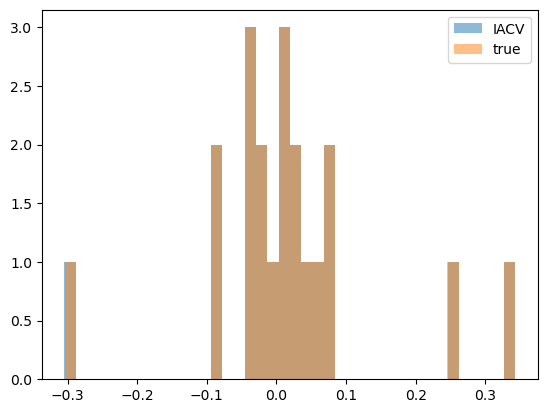

In [13]:
plt.hist(np.mean(clf.loo_iacv_, axis=0), alpha=0.5, bins=40, label="IACV")
plt.hist(np.mean(clf.loo_true_, axis=0), alpha=0.5, bins=40, label="true")
plt.legend()

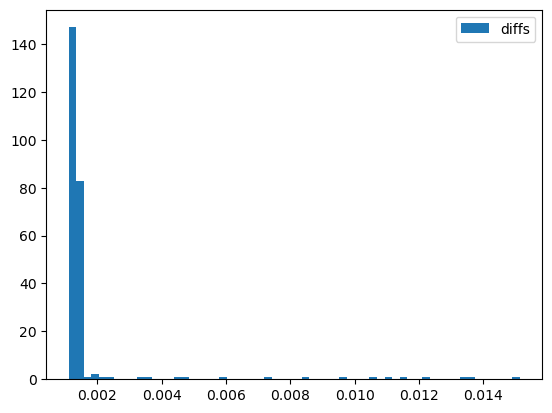

In [14]:
plt.hist(np.linalg.norm(clf.loo_iacv_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.legend()

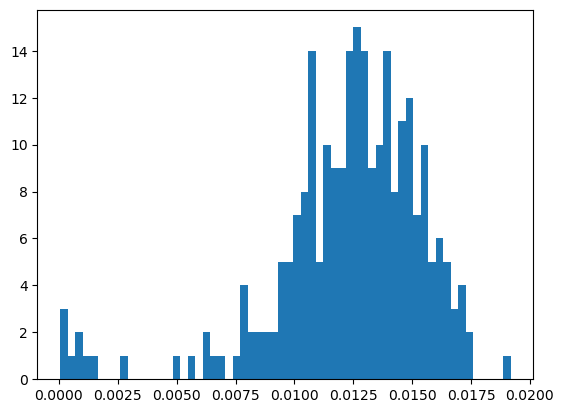

In [15]:
plt.hist(np.linalg.norm(clf.weights_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.show()

In [16]:
clf.loo_iacv_

Array([[ 0.25962302, -0.02333348, -0.0807143 , ..., -0.0429199 ,
        -0.29961735,  0.02975601],
       [ 0.25364804, -0.0280668 , -0.07534243, ..., -0.03948596,
        -0.30672628,  0.02539684],
       [ 0.25964117, -0.03023442, -0.07576422, ..., -0.04286707,
        -0.30279598,  0.0228433 ],
       ...,
       [ 0.25588438, -0.02509678, -0.08025065, ..., -0.04168062,
        -0.3078475 ,  0.02868967],
       [ 0.2558921 , -0.02848981, -0.08259553, ..., -0.04890994,
        -0.30218068,  0.02767216],
       [ 0.2597097 , -0.02142279, -0.07872226, ..., -0.04338353,
        -0.30554995,  0.03022488]], dtype=float32)

In [17]:
clf.loo_true_

array([[ 0.25814833, -0.02607135, -0.0804288 , ..., -0.04279346,
        -0.30100403,  0.02876881],
       [ 0.25306851, -0.02806569, -0.07515091, ..., -0.0395139 ,
        -0.30609573,  0.02538861],
       [ 0.25900318, -0.03016678, -0.07553563, ..., -0.04291326,
        -0.30215397,  0.02283431],
       ...,
       [ 0.25526311, -0.02506868, -0.07992196, ..., -0.04161709,
        -0.30720799,  0.02871158],
       [ 0.25716031, -0.0286353 , -0.07987554, ..., -0.04264398,
        -0.30451776,  0.02808766],
       [ 0.25907858, -0.02141389, -0.07851158, ..., -0.04341013,
        -0.30492816,  0.03017499]])

In [18]:
iacv_mean = np.mean(clf.loo_iacv_, axis=0)
coef = iacv_mean/np.linalg.norm(iacv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.04057139903306961 | pct 0.0145555529743433


In [19]:
true_cv_mean = np.mean(clf.loo_true_, axis=0)
coef = true_cv_mean/np.linalg.norm(true_cv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.04059819143503683 | pct 0.014563336682808072


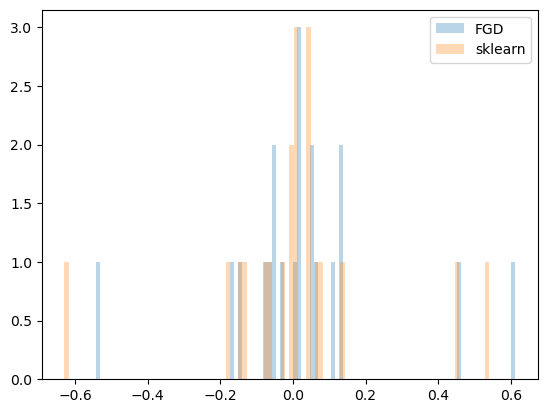

In [20]:
coef = clf.weights_/np.linalg.norm(clf.weights_)
nbin = 100
plt.hist(coef, bins=nbin, label="FGD", alpha=0.3)
plt.hist(sk_coef.flatten(), bins=nbin, label="sklearn", alpha=0.3)
plt.legend()
plt.show()

In [31]:
fig, ax = plt.subplots()
ax.plot(np.min(clf.cond_nums_, axis=1), label="Min Condition Number", c='b')
ax.plot(np.max(clf.cond_nums_, axis=1), label="Max Condition Number", c='r')
ax.plot(np.mean(clf.cond_nums_, axis=1), label="Mean Condition Number", c='purple')
ax.plot(clf.cond_num_bound_, label="Bound", c="black", linestyle="--")

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Condition No.")
ws = 1.95 # 1.75
hs = 1.85 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
#fig.legend()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.show()
plt.savefig('svm_conv_bound_cond_no.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_16812/300035429.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


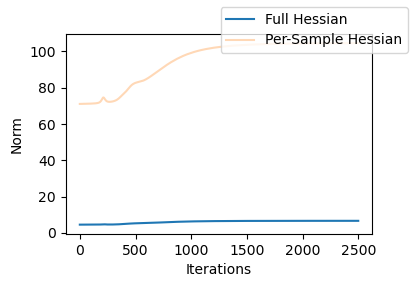

In [22]:
fig, ax = plt.subplots()
hess_norms = np.asarray(clf.hess_norms_)
ax.plot(hess_norms[:, 0], label="Full Hessian")
ax.plot(hess_norms[:, 1], label="Per-Sample Hessian", alpha=0.3)

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Norm")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend()
plt.show()

In [23]:
np.mean(clf.cond_nums_, axis=1)[np.argmax(np.mean(clf.cond_nums_, axis=1))]

2.2849135

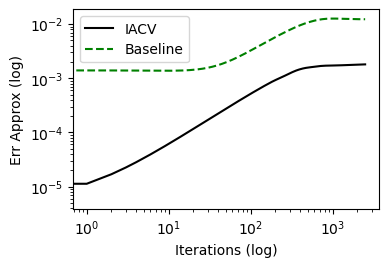

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

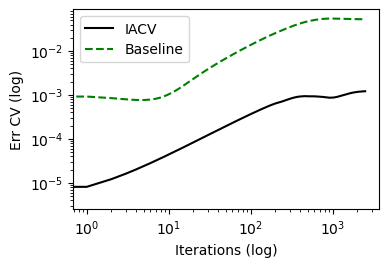

<Figure size 640x480 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
ax.plot(clf.err_cv_["IACV"], label="IACV", c='black')
ax.plot(clf.err_cv_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err CV (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

## fig, ax = plt.subplots()
start = 0
ax.plot(lambdas[start:], iacv_means[start:], label="IACV")
ax.plot(lambdas[start:], true_means[start:], label="true", linestyle="--")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean of CV Iterates")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_lambda_coef_mod.pgf', bbox_inches='tight', pad_inches=0)